In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import sys
sys.path.append('/media/HD2/Vineeth/PostDoc_Simulations/Github/PyOR_V1/Source')

import PythonOnResonance as PyOR

import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib notebook
import sympy as sp
from sympy import *

In [2]:
# Define Spin quantum numbers of individual spins
Slist1 = [1/2]

In [3]:
# Generate Spin Operator
hbarEQ1 = True # If True, hbar = 1
System = PyOR.Numerical_MR(Slist1,hbarEQ1)
Sx,Sy,Sz = System.SpinOperator()
Sp,Sm = System.PMoperators(Sx,Sy)


PyOR default parameters/settings
--------------------------------
Rdamping =  False
print_Larmor =  True
ode_method =  RK45
SparseM =  False


In [4]:
#System.PyOR_Version()

In [5]:
if False:
    pulseFile = '/opt/topspin4.1.4/exp/stan/nmr/lists/wave/square.1000'
else:    
    pulseFile = '/opt/topspin4.1.4/exp/stan/nmr/lists/wave/Gaus1.1000'
pulseLength = 1000.0e-6 
RotatioAngle = 270.0
t, amp, phase = System.ShapedPulse_Bruker(pulseFile,pulseLength,RotatioAngle)

Nutation frequency of hard pulse for given pulse length and rotation angle:  750.0
Scaling Factor:  0.41157947346557794
Maximum nuB1:  1822.24831011337
Period corresponding to maximum nuB1:  0.0005487726312874373


<IPython.core.display.Javascript object>


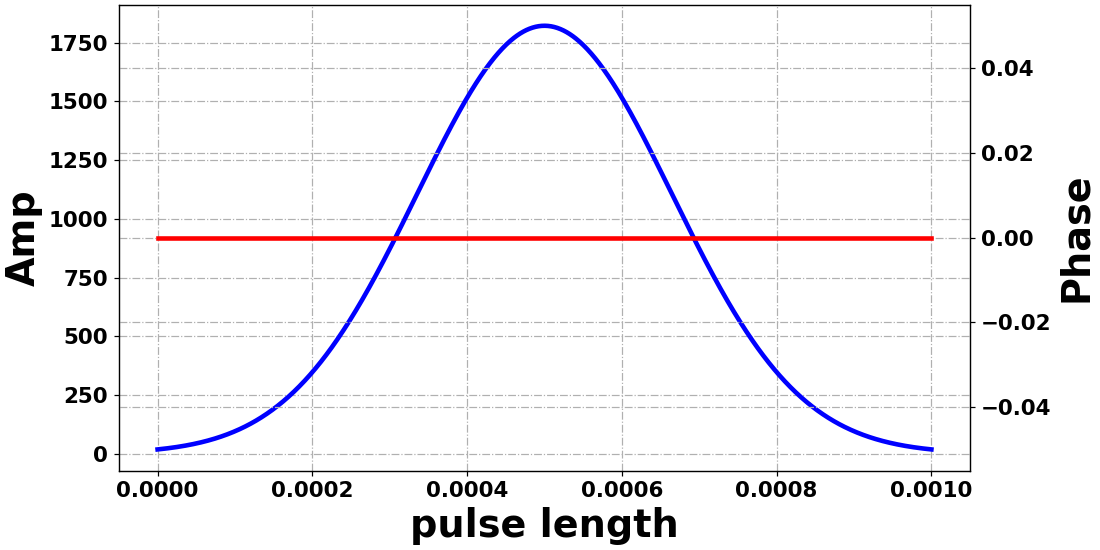

No handles with labels found to put in legend.
No handles with labels found to put in legend.


In [6]:
System.PlottingTwin(1,t,amp, phase,"pulse length","Amp","Phase","blue","red")

In [7]:
Kind = "previous"
Iamp, Iphase = System.ShapedPulse_Interpolate(t,amp,phase,Kind)
type(Iamp)

scipy.interpolate.interpolate.interp1d

<IPython.core.display.Javascript object>


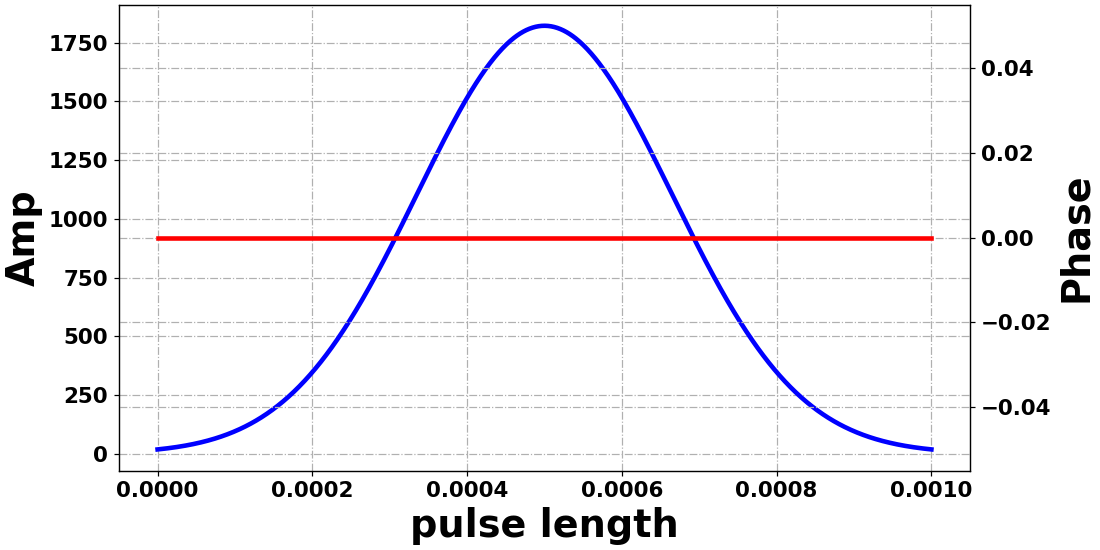

No handles with labels found to put in legend.
No handles with labels found to put in legend.


In [8]:
System.PlottingTwin(2,t,Iamp(t), Iphase(t),"pulse length","Amp","Phase","blue","red")

In [9]:
# Gyromagnetic Ratio
Gamma = [System.gammaH1]
# B0 Field in Tesla, Static Magnetic field (B0) along Z
B0 = System.L500
# Rotating Frame Frequency
OmegaRF = [-System.gammaH1*B0]
# Offset Frequency in rotating frame (Hz)
Offset = [0]
# generate Larmor Frequencies
LarmorF = System.LarmorFrequency(Gamma,B0,Offset)
# Lab Frame Hamiltonian
Hz_lab = System.Zeeman(LarmorF,Sz)
# Rotating Frame Hamiltonian
Hz = System.Zeeman_RotFrame(LarmorF,Sz,OmegaRF)

Larmor Frequency in MHz:  [-500.14451648]


In [10]:
Thermal_DensMatrix = False

if Thermal_DensMatrix:
    # Spin temperature of individual spins (initial) Kelvin
    Tin = [300.0,300.0] 
    
    # Spin temperature of individual spins (equlibrium) Kelvin
    Tfi = [300.0,300.0] 
    
    # High Temperature
    HT_approx = False
    
    # Initial Density Matrix
    rho_in = System.EqulibriumDensityMatrix_Advance(LarmorF,Sz,Tin,HT_approx)
    
    # Equlibrium Density Matrix
    rhoeq = System.EqulibriumDensityMatrix_Advance(LarmorF,Sz,Tfi,HT_approx)
else:
    rho_in = np.sum(Sz,axis=0)
    rhoeq = np.sum(Sz,axis=0)

In [11]:
R1 = 0.0
R2 = 0.0

Rprocess = "No Relaxation"
System.Relaxation_Constants(R1,R2)

In [12]:
RDgain = [30]
RDphase = [0]
Rdamping = False
System.RDparameters(RDgain,RDphase,Rdamping)

In [13]:
AQ = pulseLength
print("Time = ", AQ)
Npoints = 1000
dt = AQ / Npoints
print("Number of points in the simulation", Npoints)

"""
option for solver, "method": "Unitary Propagator" or "ODE Solver" or "ODE Solver ShapedPulse"
"""

Omega1= Iamp
Omega1freq= 0.0
Omega1Phase= Iphase
System.ShapePulse_Function("Bruker")
System.ShapedPulse_Bruker_Parameters(Sx,Sy,Omega1,Omega1freq,Omega1Phase)

Time =  0.001
Number of points in the simulation 1000


In [14]:
method = "ODE Solver ShapedPulse"
start_time = time.time()
t, rho_t = System.Evolution_H(rhoeq,rho_in,Sx,Sy,Sz,Sp,Sm,Hz,dt,Npoints,method,Rprocess)
end_time = time.time()
timetaken = end_time - start_time
print("Total time = %s seconds " % (timetaken))

Total time = 26.492836475372314 seconds 


In [15]:
t, Mx1 = System.Expectation_H(rho_t,Sx[0],dt,Npoints)
t, My1 = System.Expectation_H(rho_t,Sy[0],dt,Npoints)
t, Mz1 = System.Expectation_H(rho_t,Sz[0],dt,Npoints)

<IPython.core.display.Javascript object>


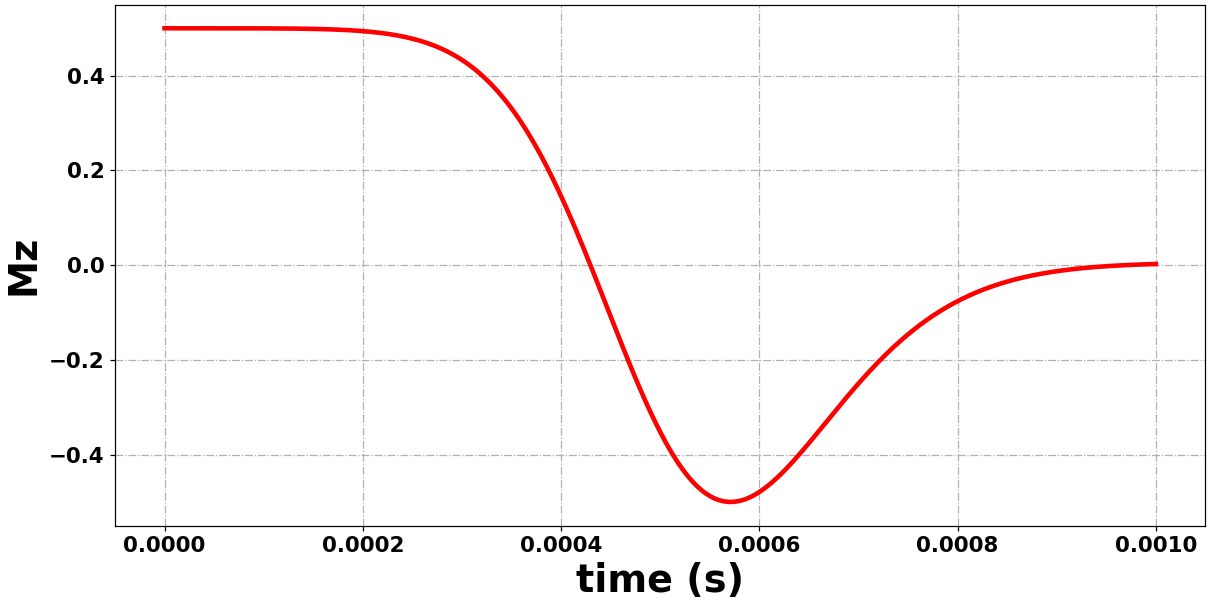

/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
No handles with labels found to put in legend.


(<Figure size 1000x500 with 1 Axes>,
 <matplotlib.widgets.SpanSelector at 0x7f84af1fc6a0>)

In [16]:
System.Plotting_SpanSelector(3,t,Mz1,"time (s)","Mz","red")

<IPython.core.display.Javascript object>


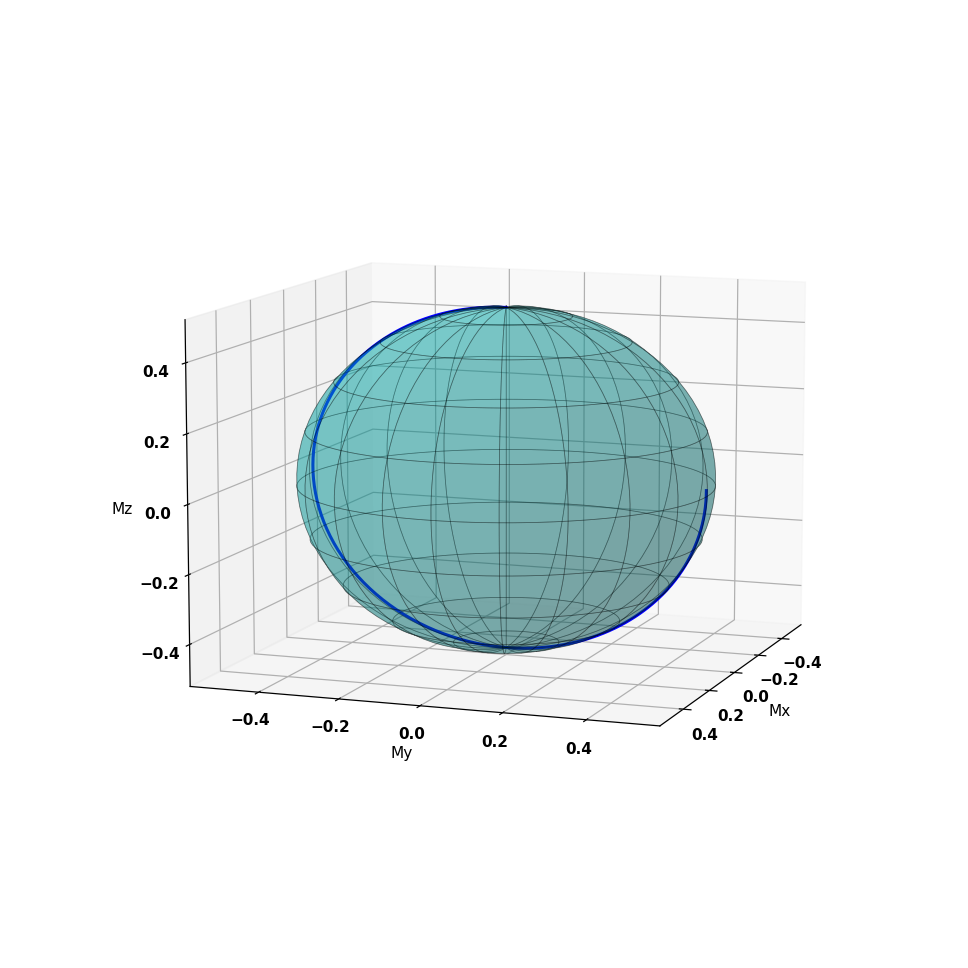

/opt/anaconda3/lib/python3.9/site-packages/mpl_toolkits/mplot3d/axes3d.py:1813: ComplexWarning: Casting complex values to real discards the imaginary part
  v1[poly_i, :] = ps[i1, :] - ps[i2, :]
/opt/anaconda3/lib/python3.9/site-packages/mpl_toolkits/mplot3d/axes3d.py:1814: ComplexWarning: Casting complex values to real discards the imaginary part
  v2[poly_i, :] = ps[i2, :] - ps[i3, :]
/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [17]:
plot_vector = False
scale_datapoints = 2
System.PlottingSphere(5,Mx1,My1,Mz1,rhoeq,np.sum(Sz,axis=0),plot_vector,scale_datapoints)